In [61]:
from kan import *
import pandas as pd
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split



# Kolmogorov-Arnold Network (KAN)

In [62]:

# Step 1: Read the CSV into a DataFrame
csv_file = 'data/train_transformed_full.csv'
df = pd.read_csv(csv_file)

df = df.sample(frac=0.001, random_state=42)  # Subsample for rapid iteration


# Step 2: Convert DataFrame to Tensors
# Assuming the last column is the label and the rest are features
features = df.iloc[:, :-1].values
labels = df.iloc[:, -1].values

# Split the data into training and testing sets
features_train, features_test, labels_train, labels_test = train_test_split(
    features, labels, test_size=0.2, random_state=42
)

# Convert to tensors
features_train_tensor = torch.tensor(features_train, dtype=torch.float32)
labels_train_tensor = torch.tensor(labels_train, dtype=torch.float32)
features_test_tensor = torch.tensor(features_test, dtype=torch.float32)
labels_test_tensor = torch.tensor(labels_test, dtype=torch.float32)

# Build dataset the way pykan likes
dataset = {}

dataset['train_input'] = features_train_tensor
dataset['test_input'] = features_test_tensor
dataset['train_label'] = labels_train_tensor
dataset['test_label'] = labels_test_tensor




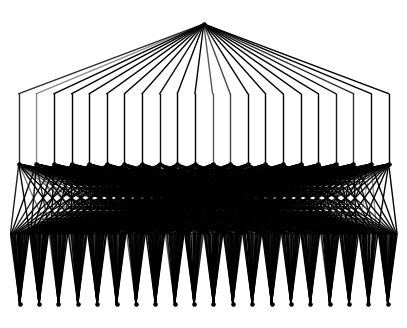

In [63]:
input_shape = dataset['train_input'].shape[1]
model = KAN(width=[input_shape, 22, 1], grid=3, k=5, seed=23)


model(dataset['train_input'])
model.plot(beta=100)


In [64]:
num_steps = 10

model.train(dataset, opt="LBFGS", steps=num_steps, lamb=0.01, save_fig_freq=20)

description:   0%|                                                           | 0/10 [00:00<?, ?it/s]

train loss: 5.90e-02 | test loss: 7.05e-02 | reg: 1.99e+01 : 100%|██| 10/10 [02:28<00:00, 14.85s/it]


{'train_loss': [array(0.07625705, dtype=float32),
  array(0.058415, dtype=float32),
  array(0.06539011, dtype=float32),
  array(0.05815886, dtype=float32),
  array(0.05677143, dtype=float32),
  array(0.0555857, dtype=float32),
  array(0.05687993, dtype=float32),
  array(0.05862421, dtype=float32),
  array(0.05885541, dtype=float32),
  array(0.05904963, dtype=float32)],
 'test_loss': [array(0.30089608, dtype=float32),
  array(0.27013612, dtype=float32),
  array(0.2294758, dtype=float32),
  array(0.23434144, dtype=float32),
  array(0.23613366, dtype=float32),
  array(0.06400923, dtype=float32),
  array(0.06159472, dtype=float32),
  array(0.05895559, dtype=float32),
  array(0.05956031, dtype=float32),
  array(0.07046776, dtype=float32)],
 'reg': [array(26.990068, dtype=float32),
  array(25.150002, dtype=float32),
  array(23.435024, dtype=float32),
  array(21.834362, dtype=float32),
  array(21.457178, dtype=float32),
  array(21.147293, dtype=float32),
  array(20.920742, dtype=float32),
  a

In [65]:
model.plot()

Error in callback <function flush_figures at 0x7fe6d9829550> (for post_execute):


KeyboardInterrupt: 

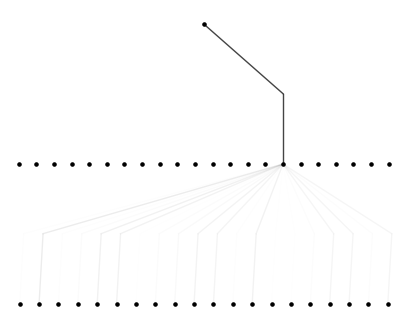

In [ ]:
model.prune()
model.plot(mask=True)

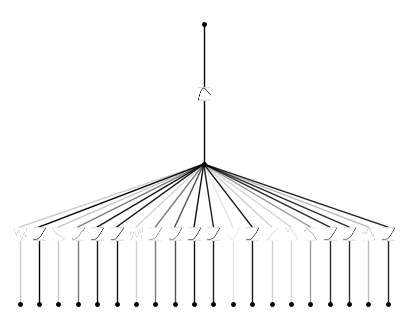

In [ ]:
model = model.prune()
model(dataset['train_input'])
model.plot(beta=100)

In [ ]:
model.train(dataset, opt="LBFGS", steps=50)

train loss: 5.38e-02 | test loss: 5.39e-02 | reg: 8.90e+00 : 100%|██| 50/50 [00:09<00:00,  5.23it/s]


{'train_loss': [array(0.05384244, dtype=float32),
  array(0.05383955, dtype=float32),
  array(0.05383955, dtype=float32),
  array(0.05383955, dtype=float32),
  array(0.05383895, dtype=float32),
  array(0.05383894, dtype=float32),
  array(0.05383894, dtype=float32),
  array(0.05383894, dtype=float32),
  array(0.05383894, dtype=float32),
  array(0.05383894, dtype=float32),
  array(0.05383892, dtype=float32),
  array(0.05383892, dtype=float32),
  array(0.05383892, dtype=float32),
  array(0.05383891, dtype=float32),
  array(0.05383892, dtype=float32),
  array(0.05383892, dtype=float32),
  array(0.05383892, dtype=float32),
  array(0.05383892, dtype=float32),
  array(0.05383891, dtype=float32),
  array(0.05383892, dtype=float32),
  array(0.05383891, dtype=float32),
  array(0.05383891, dtype=float32),
  array(0.05383892, dtype=float32),
  array(0.05383892, dtype=float32),
  array(0.05383891, dtype=float32),
  array(0.05383892, dtype=float32),
  array(0.05383891, dtype=float32),
  array(0.0538

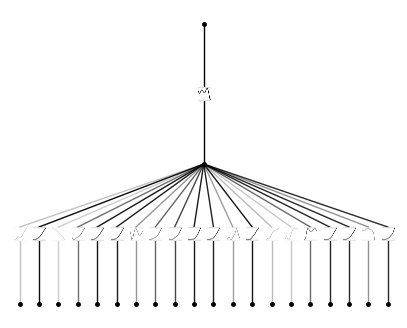

In [ ]:
model.plot(beta=75)

In [ ]:
lib = ['x','x^2','x^3','x^4','exp','log','sqrt','tanh','sin','abs']
model.auto_symbolic(lib=lib)

fixing (0,0,0) with x^3, r2=0.8757656812667847
fixing (0,1,0) with tanh, r2=0.9994966387748718
fixing (0,2,0) with sin, r2=0.9965856671333313
fixing (0,3,0) with log, r2=0.980076014995575
fixing (0,4,0) with sin, r2=0.9990397691726685
fixing (0,5,0) with tanh, r2=0.9996054768562317
fixing (0,6,0) with sin, r2=0.9255599975585938
fixing (0,7,0) with tanh, r2=0.9952205419540405
fixing (0,8,0) with x^2, r2=0.9934580326080322
fixing (0,9,0) with tanh, r2=0.9986805319786072
fixing (0,10,0) with tanh, r2=0.9954053163528442
fixing (0,11,0) with sin, r2=0.8133952617645264
fixing (0,12,0) with sin, r2=0.9946675300598145
fixing (0,13,0) with tanh, r2=0.9954830408096313
fixing (0,14,0) with tanh, r2=0.9710559248924255
fixing (0,15,0) with sin, r2=0.6303812265396118
fixing (0,16,0) with tanh, r2=0.9990455508232117
fixing (0,17,0) with tanh, r2=0.9958631992340088
fixing (0,18,0) with x^2, r2=0.7007946968078613
fixing (0,19,0) with x^4, r2=0.9935532808303833
fixing (1,0,0) with x^4, r2=0.488948822021

In [ ]:
model.symbolic_formula

<bound method KAN.symbolic_formula of KAN(
  (biases): ModuleList(
    (0): Linear(in_features=22, out_features=1, bias=False)
    (1): Linear(in_features=1, out_features=1, bias=False)
  )
  (act_fun): ModuleList(
    (0): KANLayer(
      (base_fun): SiLU()
    )
    (1): KANLayer(
      (base_fun): SiLU()
    )
  )
  (base_fun): SiLU()
  (symbolic_fun): ModuleList(
    (0): Symbolic_KANLayer()
    (1): Symbolic_KANLayer()
  )
)>

In [ ]:
model.train(dataset, opt="LBFGS", steps=50)

train loss: nan | test loss: nan | reg: nan : 100%|█████████████████| 50/50 [00:47<00:00,  1.04it/s]


{'train_loss': [array(nan, dtype=float32),
  array(nan, dtype=float32),
  array(nan, dtype=float32),
  array(nan, dtype=float32),
  array(nan, dtype=float32),
  array(nan, dtype=float32),
  array(nan, dtype=float32),
  array(nan, dtype=float32),
  array(nan, dtype=float32),
  array(nan, dtype=float32),
  array(nan, dtype=float32),
  array(nan, dtype=float32),
  array(nan, dtype=float32),
  array(nan, dtype=float32),
  array(nan, dtype=float32),
  array(nan, dtype=float32),
  array(nan, dtype=float32),
  array(nan, dtype=float32),
  array(nan, dtype=float32),
  array(nan, dtype=float32),
  array(nan, dtype=float32),
  array(nan, dtype=float32),
  array(nan, dtype=float32),
  array(nan, dtype=float32),
  array(nan, dtype=float32),
  array(nan, dtype=float32),
  array(nan, dtype=float32),
  array(nan, dtype=float32),
  array(nan, dtype=float32),
  array(nan, dtype=float32),
  array(nan, dtype=float32),
  array(nan, dtype=float32),
  array(nan, dtype=float32),
  array(nan, dtype=float32),


In [ ]:
model.symbolic_formula()[0][0]

nan